In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh_tridiagonal

In [24]:
def parabolicPotential(x_m, omega_radps=1, m_SI=1):
    return 0.5*m_SI*omega_radps**2*x_m**2

# ENPH344 Final Project -- Finite Parabolic Well

This notebook and project explores a potential well with a parabolic form has the following potential with a finite cutoff:

$$
V(x) =
\begin{cases} 
\frac{1}{2} m \omega^2 x^2 & |x| \leq a \\
V_0 & |x| > a
\end{cases}
$$

This potential well looks like the plot shown below.

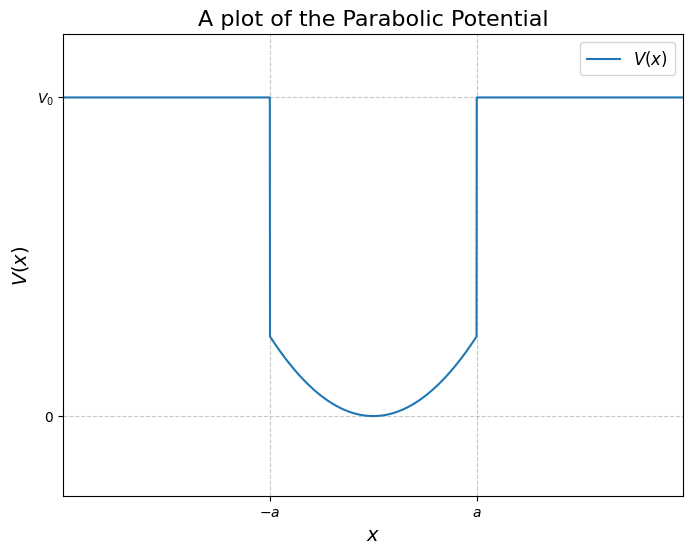

In [25]:
# A is half the width of the well
a = 1
V_0 = 2

# Value to extend the values of x for the constant potential outside the interval [-a, a]
xScaling = 3

# Generating all x values
xVals = np.linspace(-xScaling*a, xScaling*a, 3000)

# Find indices where the potential switches between regimes
left_boundary = np.where(xVals <= -a)[0][-1]
right_boundary = np.where(xVals >= a)[0][0]

# Generate the values for the constant potential outside the interval [-a, a]
potentialVals = np.zeros_like(xVals)
potentialVals[:left_boundary + 1] = V_0
potentialVals[right_boundary:] = V_0
potentialVals[left_boundary + 1:right_boundary] = parabolicPotential(xVals[left_boundary + 1:right_boundary])


# Check if any value in yVals exceeds V_0
if np.any(potentialVals > V_0):
    raise ValueError("Parabolic potential exceeds V_0. Invalid parameters.")


# Create the plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(xVals, potentialVals, label=r'$V(x)$')

# Set title and labels
ax.set_title("A plot of the Parabolic Potential", fontsize=16)
ax.set_xlabel(r"$x$", fontsize=14)
ax.set_ylabel(r"$V(x)$", fontsize=14)

# Set x and y limits and custom tick values
ax.set_xlim(-xScaling * a, xScaling * a)
ax.set_xticks([-a, a])
ax.set_xticklabels([r"$-a$", r"$a$"])

ax.set_ylim(min(potentialVals) - 0.5, V_0 * 1.2)
ax.set_yticks([0, V_0])
ax.set_yticklabels([r"$0$", r"$V_0$"])

# Add legend
ax.legend(fontsize=12)

# Show the plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Finite Difference Method
The finite difference method (FDM) lets you discretize differential equations and allows you to replace derivatives with discrete approximations which allow for much nicer algebraic equations which can be solved with linear algebra.

FDM shows that for the TISE:

$$
- \frac{\hbar^2}{2m} \frac{d^2 \psi (x)}{dx^2} + V(x) \psi (x) = E \psi (x)
$$

Its first and second derivatives can be approximated in the following manner:

$$
\frac{d \psi (x_i)}{dx} \approx \frac{\psi (x + \Delta x) - \psi (x_i)}{\Delta x}
$$

$$
\frac{d^2 \psi (x_i)}{dx^2} \approx \frac{\psi(x_{i+1}) - 2 \psi (x_i) + \psi (x_{i-1})}{(\Delta x)^2}
$$

The second derivative is much more useful to us since this appears in the Time Independent Schr&ouml;dingers Equation. Subbing our definition of this into the base equation we get:

$$
- \frac{\hbar^2}{2m} \left( \frac{\psi(x_{i+1}) - 2 \psi (x_i) + \psi (x_{i-1})}{(\Delta x)^2} \right) + V(x) \psi (x) = E \psi (x)
$$

Which can be expanded in terms of each of the indexed wave functions $\psi (x_{i-1})$, $\psi (x_i)$, and $\psi (x_{i+1})$ as the following:

$$
-\frac{\hbar^2}{2 m (\Delta x)^2} \psi (x_{i+1}) + \left( \frac{\hbar^2}{(m \Delta x)^2} + V(x_i) \right) \psi(x_i) - \frac{\hbar^2}{2 m (\Delta x)^2} \psi (x_{i-1}) = E \psi (x_i) \tag{1}
$$

In this form, we can solve using the FDM to get the valid wave functions for this potential.

Note that $-\frac{\hbar^2}{2 m (\Delta x)^2}$ is the kinetic energy operator $T$

Below we define some of the constants and set up the potential for the situation that we are modelling.

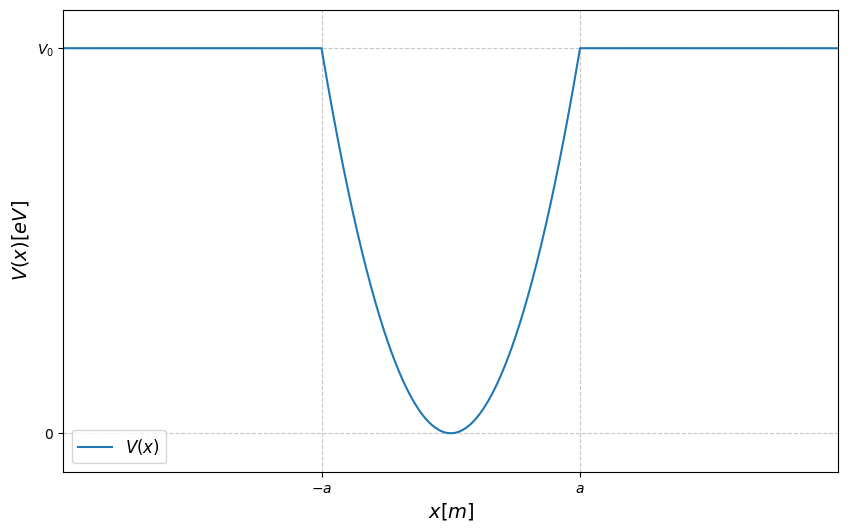

In [26]:
evToJ = 1.60218e-19

# Define some of the constants used in calculation

hbar_SI = 1.0545718e-34
mElectron_kg = 9.10938356e-31

# Define the parameters for the potential
a_m = 3e-9
omega_radps = 4e14
V0_J = 4.1 * evToJ # Defined in electron volts. Convert later with the eVtoJ function
xScaling = 3 # This is a stretch factor for the x axis of the plot

# Set up the x range to perform the analysis in. This if the same as the plot above
numPoints = 5000
xVals, dx_m = np.linspace(-xScaling*a_m, xScaling*a_m, numPoints, retstep=True) # generate values and store the step size

# Find indices where the potential switches between regimes
left_boundary = np.where(xVals <= -a_m)[0][-1]
right_boundary = np.where(xVals >= a_m)[0][0]

# Generate the potential for the given x values
potentialVals = np.zeros_like(xVals)
potentialVals[:left_boundary + 1] = V0_J
potentialVals[right_boundary:] = V0_J
potentialVals[left_boundary + 1:right_boundary] = parabolicPotential(xVals[left_boundary + 1:right_boundary], omega_radps=omega_radps, m_SI=mElectron_kg)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(xVals, potentialVals, label=r'$V(x)$')

# Set title and labels
#ax.set_title("A plot of the Parabolic Potential", fontsize=16)
ax.set_xlabel("$x [m]$", fontsize=14)
ax.set_ylabel("$V(x) [eV]$", fontsize=14)

# Set x and y limits and custom tick values
ax.set_xlim(-xScaling * a_m, xScaling * a_m)
ax.set_xticks([-a_m, a_m])
ax.set_xticklabels([f"$-a$", f"$a$"])

ax.set_ylim(min(potentialVals) - 0.1*V0_J, V0_J*1.1) # Set the y limits to be 10% above and below the potential values
ax.set_yticks([0, V0_J])
ax.set_yticklabels(["$0$", f"$V_0$"])

# Add legend
ax.legend(fontsize=12)

# Show the plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


With our potential defined, we can now use the FDM to determine the solutions to our wave function. In this case we care about the energy eigenstates of the hamiltonian where the hamiltonian is defined as:

$$
H = T + V
$$

Where T is the kinetic energy operator and V is the potential energy of the system. If we use equation 1 above and replace $\Delta x$ with our point spacing ($dx$ in this case) this solution can be solved numerically.

The triple diagonal kinetic energy operator matrix $T$ is defined below for $\psi_{i-1}$, $\psi_{1}$, and $\psi_{i+1}$, as well as the potential diagonal matrix $V$. These are added together to generate the full hamiltonian matrix $H$.

In [27]:
# The kinetic energy operator is a triple diagonal matrix to represent the FPM representation of the second derivative
T = -hbar_SI**2 / (2 * mElectron_kg * dx_m**2)  # Prefactor
diagonal_SI = np.ones(numPoints) * (-2 * T) # -2 coefficient to match the FPM representation
off_diagonal_SI = np.ones(numPoints - 1) * T
kineticMatrix_SI = np.diag(diagonal_SI) + np.diag(off_diagonal_SI, k=1) + np.diag(off_diagonal_SI, k=-1) # The k values determine how far above or below these diagonals are from the main diagonal

# The potential matrix is a diagonal matrix with the potential values on the diagonal
potentialMatrix_SI = np.diag(potentialVals)

# The Hamiltonian is the sum of the kinetic and potential energy operators
hamiltonian_SI = kineticMatrix_SI + potentialMatrix_SI

With the hamiltonian matrix generated, we now need to solve for its eigenvalues. This is done with the eigh_tridiagonal function from scipy which is specifically optimized for solving tri-diagonal matrices like the hamiltonian in this case.

In [28]:
# Calculate the eigenvalues and eigenvectors of the Hamiltonian. np.diag gives the diagonal of the hamiltonian now with a specified offset
eigenvalues_J, eigenvectors_norm = eigh_tridiagonal(np.diag(hamiltonian_SI), np.diag(hamiltonian_SI, k=1))

print(f"The first eigenvalue is {eigenvalues_J[0]:.2e}J or {eigenvalues_J[0] / evToJ:.2e} eV")
print(f"The second eigenvalue is {eigenvalues_J[1]:.2e}J or {eigenvalues_J[1] / evToJ:.2e} eV")
print(f"The third eigenvalue is {eigenvalues_J[2]:.2e}J or {eigenvalues_J[2] / evToJ:.2e} eV")

The first eigenvalue is 2.11e-20J or 1.32e-01 eV
The second eigenvalue is 6.33e-20J or 3.95e-01 eV
The third eigenvalue is 1.05e-19J or 6.58e-01 eV


With our eigenstates generated for the wave function, all thats left is to plot them.

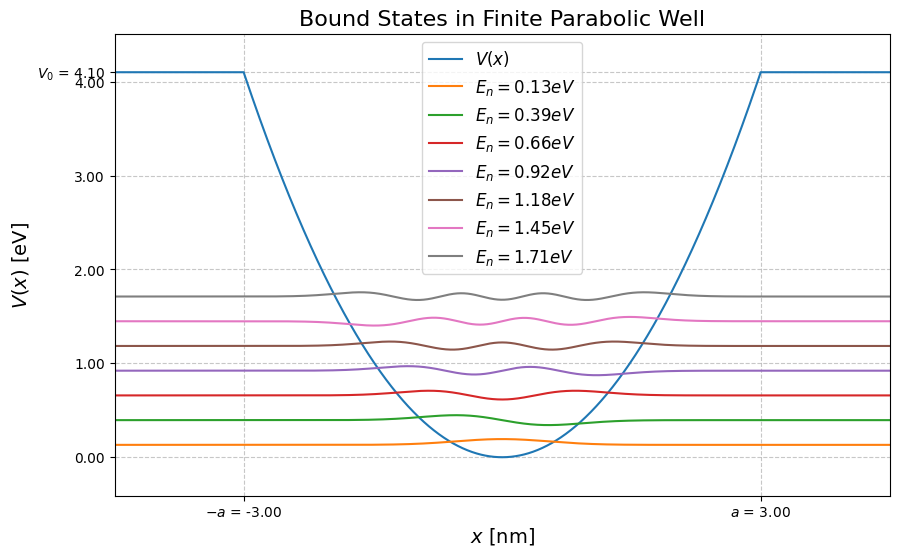

In [29]:
# Convert eigenvalues to eV
eigenvalues_eV = eigenvalues_J / evToJ

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the potential
ax.plot(xVals * 1e9, potentialVals / evToJ, label='$V(x)$')

numEigenstates = 7

# Plot the first X eigenstates
for i in range(numEigenstates):
    ax.plot(xVals * 1e9, eigenvectors_norm[:, i] + eigenvalues_eV[i], label=fr'$E_n={eigenvalues_eV[i]:.2f} eV$')

# Set title and labels
ax.set_title("Bound States in Finite Parabolic Well", fontsize=16)
ax.set_xlabel("$x$ [nm]", fontsize=14)
ax.set_ylabel("$V(x)$ [eV]", fontsize=14)

# Set x limits and custom tick labels
ax.set_xlim(-1.5 * a_m * 1e9, 1.5 * a_m * 1e9)
ax.set_xticks([-a_m * 1e9, a_m * 1e9])
ax.set_xticklabels([f"$-a$ = -{a_m * 1e9:.2f}", f"$a$ = {a_m * 1e9:.2f}"])


# Add a y tick at V_0 but keep the other y ticks as they are
current_yticks = ax.get_yticks() # Get the current y-ticks
new_yticks = np.append(current_yticks, V0_J / evToJ) # Add the new y-tick for V_0
ax.set_yticks(new_yticks) # Set the updated y-ticks

# Now set the y-tick labels to show the new tick label for V_0
ax.set_yticklabels([f"{tick:.2f}" if tick != V0_J / evToJ else f"$V_0$ = {V0_J / evToJ:.2f}" for tick in new_yticks])

# Set y limits after adding the new y-ticks to ensure limits are followed
ax.set_ylim(min(potentialVals / evToJ) - 0.1 * V0_J / evToJ, V0_J / evToJ * 1.1)  # Set the y limits to be 10% above and below the potential values

# Add legend
ax.legend(fontsize=12)

# Show the plot
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

## Applications of this phenomena

### Simplifying

Now that the solving work has been completed, combine all this data analysis and plotting into a single function to vastly simplify generating these plots for quick and easy analysis.

In [30]:
def plotParabolicPotential (xVals_m : np.ndarray[float], 
                            potentialVals_J : np.ndarray[float], 
                            V0_J : float,
                            a_m,
                            angularFreq,
                            mass_kg,
                            eigenValues_SI : np.ndarray[float], 
                            eigenVectors_norm, 
                            xScaling,
                            numEigenstates=5, 
                            ):
    '''This function takes SI values for a parabolic potential well and graphs the potential as well as its eigenstates
    
    Parameters:
    xVals_m (numpy array): The x values to plot the potential against in meters
    potentialVals_J (numpy array): The potential values to plot in Joules
    V0_J (float): The value of the potential at the edges of the well in Joules
    
    EVERYTHING INPUT SHOULD BE IN SI UNITS. THIS FUNCTION WILL CONVERT TO EV FOR PLOTTING
    '''

    # Convert the potential values to eV for plotting
    evToJ = 1.60218e-19
    potentialVals_eV = potentialVals_J / evToJ
    V0_eV = V0_J / evToJ

    eigenValues_eV = eigenValues_SI / evToJ

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot the potential well
    ax.plot(xVals_m, potentialVals_eV, label=r'$V(x)$')

    # Plot the first X eigenstates
    for i in range(numEigenstates):
        ax.plot(xVals_m, eigenVectors_norm[:, i]*2 + eigenValues_eV[i], label=fr'$E_{i}={eigenValues_eV[i]:.2f} eV$')
    
    # Plot a horizontal line at V=0 for reference
    ax.axhline(0, color='black', linestyle='-', alpha=1)

    #----------------------#
    #----# FORMATTING #----#
    #----------------------#

    # Set title and labels
    ax.set_title(f"$\omega$ = {angularFreq:.2e} Rad/s, m = {mass_kg:.2e} kg", fontsize=16)
    ax.set_xlabel("$x [m]$", fontsize=14)
    ax.set_ylabel("$V(x) [eV]$", fontsize=14)

    # Set x limits and custom tick labels. Everything is in SI units so all the distances are in meters ##FOR NOW##
    ax.set_xticks([-a_m, a_m])
    ax.set_xticklabels([f"$-a$ = -{a_m:.2e}", f"$a$ = {a_m:.2e}"])
    ax.set_xlim(-xScaling * a_m, xScaling * a_m)

    # Add a y tick at V_0 but keep the other y ticks as they are
    current_yticks = ax.get_yticks() # Get the current y-ticks
    new_yticks = np.append(current_yticks, V0_eV) # Add the new y-tick for V_0
    ax.set_yticks(new_yticks) # Set the updated y-ticks

    # Now set the y-tick labels to show the new tick label for V_0
    ax.set_yticklabels([f"{tick:.2f}" if tick != V0_eV else f"$V_0$ = {V0_eV:.2f}" for tick in new_yticks])

    # Set y limits after adding the new y-ticks to ensure limits are followed
    ax.set_ylim(min(potentialVals_eV) - 0.05 * V0_eV, V0_eV * 1.05)  # Set the y limits to be 10% above and below the potential values


    # Add legend
    ax.legend(fontsize=12)

    # Show the plot
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

def computeParabolicSolutions (a_m, omega_radps, V0_eV, particle_mass_kg, xScaling=2, plot=True, numEigenstates=5):
    evToJ = 1.60218e-19

    V0_J = V0_eV * evToJ
    hbar_SI = 1.0545718e-34
    m_kg = particle_mass_kg

    # Set up the x range to perform the analysis in. Scaling by some factor to stretch my plot out a bit
    numPoints = 1000
    xVals, dx_m = np.linspace(-xScaling * a_m, xScaling * a_m, numPoints, retstep=True)  # generate values and store the step size

    # Find indices where the potential switches between constant and parabolic regimes
    left_boundary = np.where(xVals <= -a_m)[0][-1]
    right_boundary = np.where(xVals >= a_m)[0][0]

    # Generate the potential for the given x values. THIS IS IN SI UNITS. This is also a really ugly way to do this because the indexing is weird but this was how my brain processed it and it works so I'm not changing it
    potentialVals_J = np.zeros_like(xVals)
    potentialVals_J[:left_boundary + 1] = V0_J
    potentialVals_J[right_boundary:] = V0_J
    potentialVals_J[left_boundary + 1:right_boundary] = parabolicPotential(xVals[left_boundary + 1:right_boundary], omega_radps=omega_radps, m_SI=particle_mass_kg)

    potentialVals_eV = potentialVals_J / evToJ

    # Check if any value in yVals exceeds V_0 and complain if they do.
    if np.any(potentialVals_eV > V0_eV):
        raise ValueError("Parabolic potential exceeds V_0. Invalid parameters. " +
                         "Try reducing m, omega or a, or increasing V_0. " +
                         f"The max potential value is {np.max(potentialVals_eV)} eV and V_0 is {V0_eV} eV")

    # The kinetic energy operator is a triple diagonal matrix to represent the FPM representation of the second derivative
    T = -hbar_SI ** 2 / (2 * m_kg * dx_m ** 2)  # Kinetic energy operator term
    diagonal_SI = np.ones(numPoints) * (-2 * T) # Making center of the diagonal matrix
    off_diagonal_SI = np.ones(numPoints - 1) * T # Making the off diagonals (they are mirrored across the center axis so only one is needed)
    kineticMatrix_SI = np.diag(diagonal_SI) + np.diag(off_diagonal_SI, k=1) + np.diag(off_diagonal_SI, k=-1) # Assembling final tridiagonal kinetic energy matrix. The k values determine how far above or below these diagonals are from the main diagonal

    # The potential matrix is a diagonal matrix with the potential values on the diagonal
    potentialMatrix_J = np.diag(potentialVals_J)

    # The Hamiltonian is the sum of the kinetic and potential energy operators. See above theory for more details
    hamiltonian_SI = kineticMatrix_SI + potentialMatrix_J

    # Calculate the eigenvalues and eigenvectors of the Hamiltonian. np.diag gives the diagonal of the hamiltonian now with a specified offset
    eigenvalues_J, eigenvectors_norm = eigh_tridiagonal(np.diag(hamiltonian_SI), np.diag(hamiltonian_SI, k=1))
    eigenvalues_eV = eigenvalues_J / evToJ # unused but kept for consistency

    if plot:
        plotParabolicPotential(xVals, potentialVals_J, V0_J, a_m, omega_radps, particle_mass_kg, eigenvalues_J, eigenvectors_norm, xScaling=xScaling, numEigenstates=numEigenstates) # Disgusting function call I know. I'm sorry

## 1550nm Laser Example

6.1032869852e-32
Photon energy = 1.282452e-19 J = 0.800 eV
Ideal Oscillator frequency = 1.216e+15 rad/s


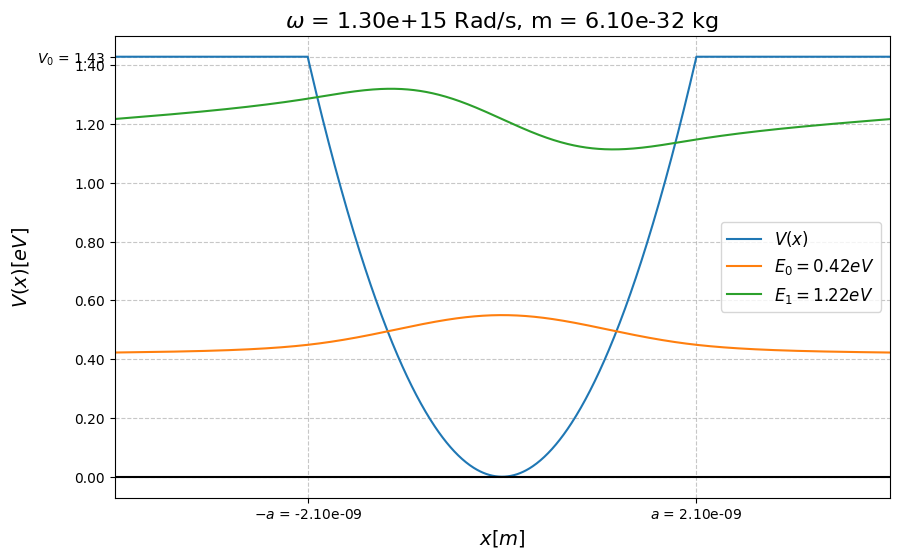

In [31]:
# Plotting energy eigenstates for a 1550nm photon in a GaAs well

GaAsElectronMass_kg = 0.067*9.10938356e-31
print(GaAsElectronMass_kg)

hbar_eV = 6.582119569e-16

# Find oscillator frequency
ePhoton_J = (6.626e-34)*(3e8)/(1550e-9)
ePhoton_eV = ePhoton_J/evToJ
print(f"Photon energy = {ePhoton_J:3e} J = {ePhoton_eV:.3f} eV")

idealOscillatorFreq_radps = ePhoton_eV/hbar_eV
print(f"Ideal Oscillator frequency = {idealOscillatorFreq_radps:.3e} rad/s")

wellWidth_m = 2.1e-9
oscillatorFreq_radps = 1.30e15
V_0_eV = 1.429

computeParabolicSolutions(wellWidth_m, oscillatorFreq_radps, V_0_eV, GaAsElectronMass_kg, numEigenstates=2)

## 850nm Laser Example

Gallium Arsenide Electron Mass = 6.1032869852e-32 kg
Photon energy = 2.338588e-19 J = 1.460 eV
Ideal Oscillator frequency = 2.218e+15 rad/s


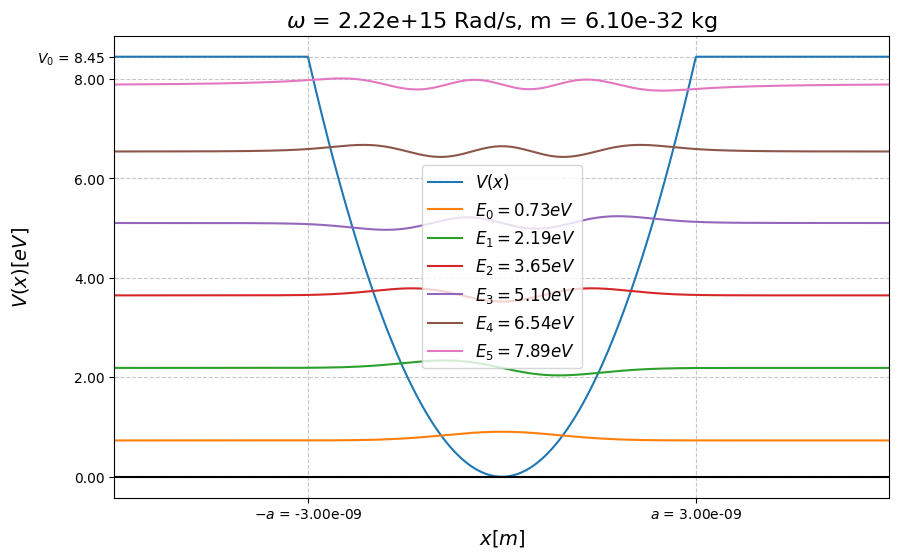

In [32]:
# Plotting energy eigenstates for a 1550nm photon in a modified GaAs well

GaAsElectronMass_kg = 0.067*9.10938356e-31
print(f"Gallium Arsenide Electron Mass = {GaAsElectronMass_kg} kg")

hbar_eV = 6.582119569e-16

# Find oscillator frequency
ePhoton_J = (6.626e-34)*(3e8)/(850e-9)
ePhoton_eV = ePhoton_J/evToJ
print(f"Photon energy = {ePhoton_J:3e} J = {ePhoton_eV:.3f} eV")

oscillatorFreq_radps = ePhoton_eV/hbar_eV
print(f"Ideal Oscillator frequency = {oscillatorFreq_radps:.3e} rad/s")

wellWidth_m = 3e-9
# oscillatorFreq_radps = 2.214e15
V_0_eV = 8.45

computeParabolicSolutions(wellWidth_m, oscillatorFreq_radps, V_0_eV, GaAsElectronMass_kg, numEigenstates=6)